# Hotel Reservations 

Müşterinin rezervasyonu kabul edip etmeyeceğini veya iptal edip etmeyeceğini tahmin eden modelin hazırlanması amaçlanmaktadır.

<img src="hotel.jpg"></img>

### Data Dictionary

### Importing Libraries

In [28]:
#!pip install xgboost

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [4]:
df=pd.read_csv("Hotel Reservations.csv")

In [5]:
df.sample(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
33569,INN33570,2,0,2,4,Meal Plan 1,0,Room_Type 4,54,2018,10,30,Online,0,0,0,111.00,1,Canceled
15591,INN15592,2,0,0,2,Meal Plan 1,0,Room_Type 1,308,2018,11,25,Offline,0,0,0,52.00,0,Canceled
20911,INN20912,2,0,2,7,Not Selected,0,Room_Type 1,7,2018,11,15,Online,0,0,0,79.14,0,Canceled
22017,INN22018,2,0,1,2,Meal Plan 1,0,Room_Type 1,46,2018,7,4,Online,0,0,0,117.90,1,Not_Canceled
25089,INN25090,2,0,0,1,Meal Plan 1,0,Room_Type 7,2,2018,12,10,Complementary,0,0,0,0.00,2,Not_Canceled
24057,INN24058,2,0,2,2,Meal Plan 1,0,Room_Type 1,96,2018,8,14,Online,0,0,0,120.15,1,Not_Canceled
24064,INN24065,1,0,1,1,Meal Plan 1,0,Room_Type 1,16,2018,1,18,Online,0,0,0,90.00,0,Not_Canceled
34551,INN34552,2,0,2,1,Meal Plan 1,0,Room_Type 4,97,2018,4,16,Online,0,0,0,102.30,0,Not_Canceled
155,INN00156,1,0,0,3,Meal Plan 1,0,Room_Type 1,4,2018,11,1,Corporate,1,1,5,65.00,1,Not_Canceled
12072,INN12073,2,0,0,1,Meal Plan 1,0,Room_Type 1,5,2017,9,19,Online,0,0,0,133.00,1,Not_Canceled


### Data Analyisis

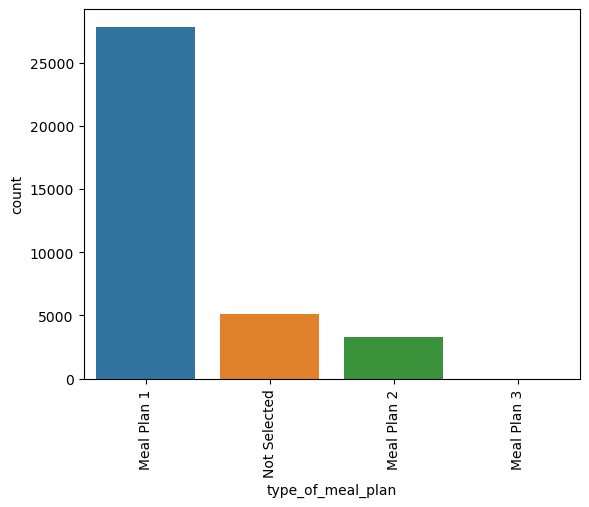

In [9]:
sns.countplot(x=df["type_of_meal_plan"])
plt.xticks(rotation=90);

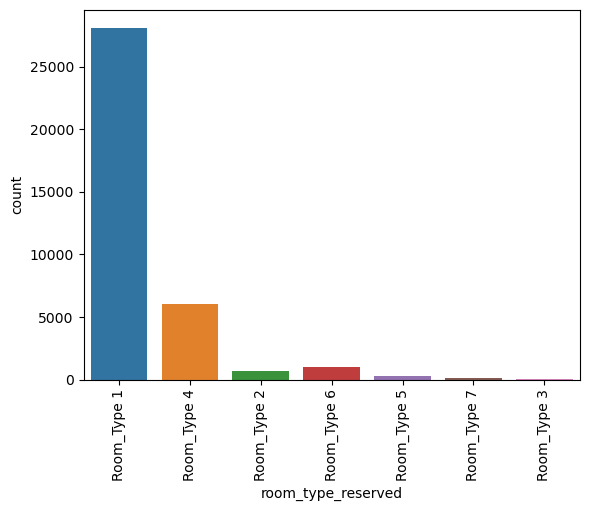

In [8]:
sns.countplot(x=df["room_type_reserved"])
plt.xticks(rotation=90); 

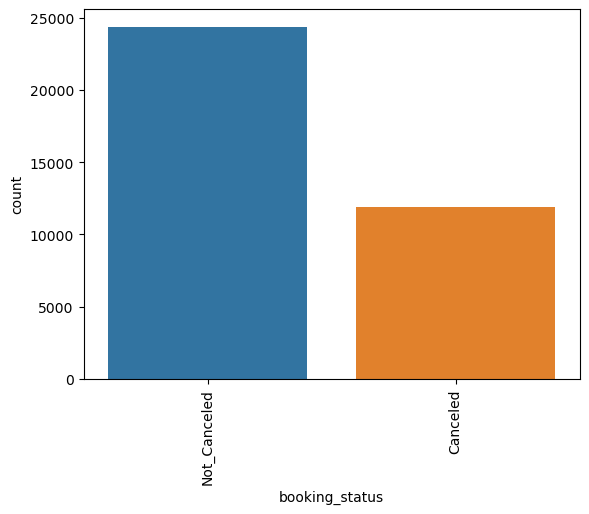

In [10]:
sns.countplot(x=df["booking_status"])
plt.xticks(rotation=90); 

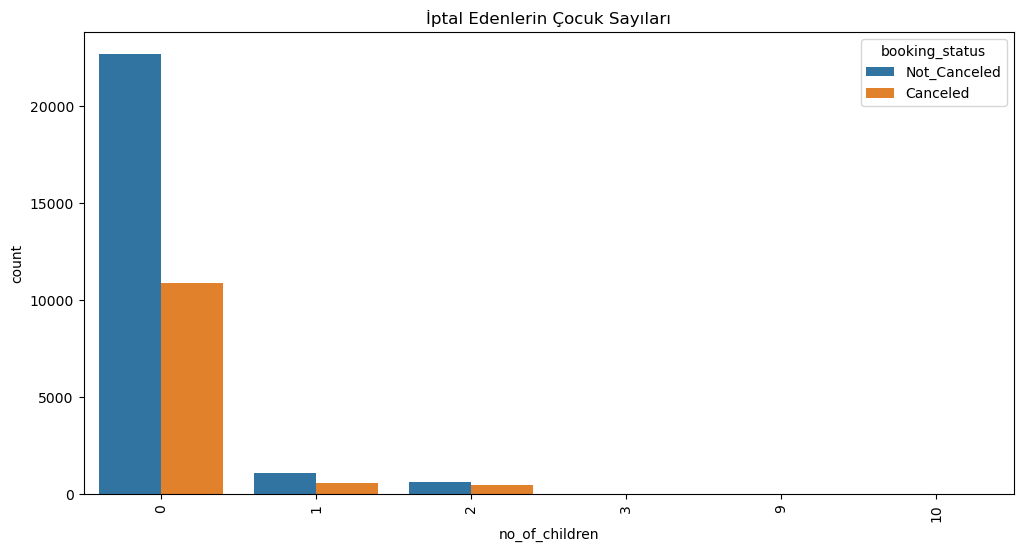

In [13]:
plt.figure(figsize=(12,6))
plt.title("İptal Edenlerin Çocuk Sayıları")
sns.countplot(x=df['no_of_children'], hue=df.booking_status); # iptal edenlerin çocuk sayıları
plt.xticks(rotation=90); 

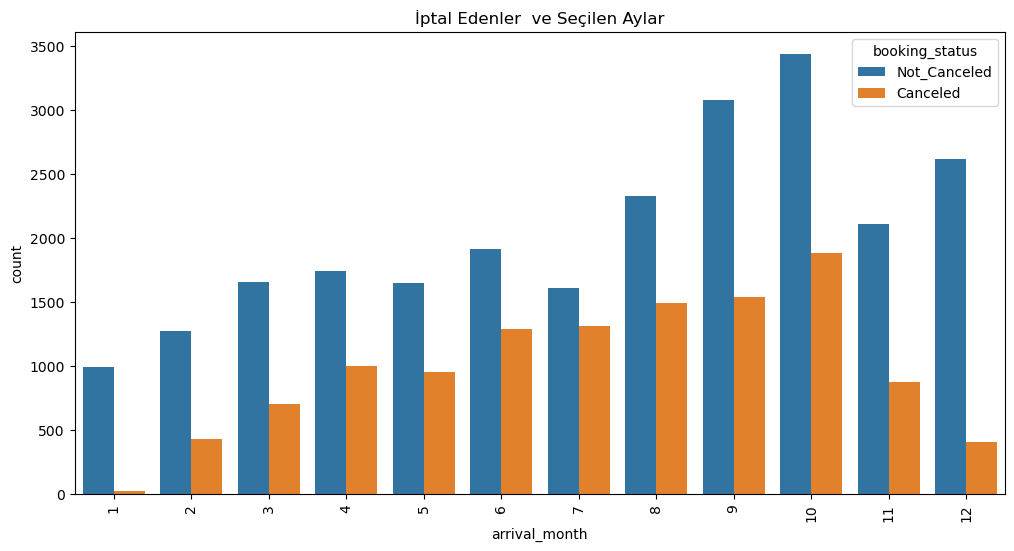

In [15]:
plt.figure(figsize=(12,6))
plt.title("İptal Edenler  ve Seçilen Aylar")
sns.countplot(x=df['arrival_month'], hue=df.booking_status);
plt.xticks(rotation=90); 

En az iptal edilme oranı Ocak ayında görülürken,en çok iptal oranı Temmuz ayında diyebiliriz. Yaz aylarında iptal oranı bir hayli fazlaken kış aylarında bu oran çok daha düşük gözüküyor. 

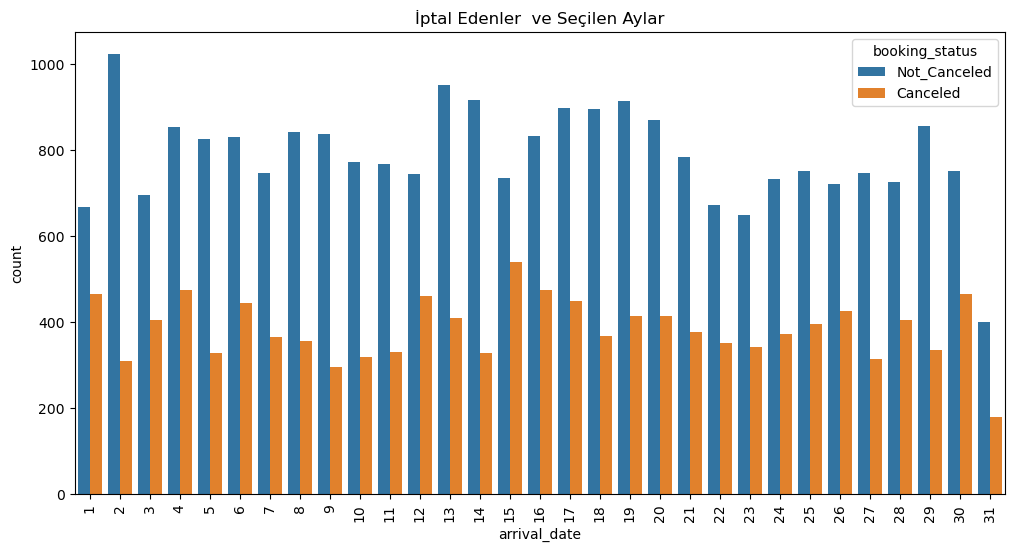

In [17]:
plt.figure(figsize=(12,6))
plt.title("İptal Edenler  ve Seçilen Aylar")
sns.countplot(x=df['arrival_date'], hue=df.booking_status);
plt.xticks(rotation=90);

Oran Olarak bakıldığında göze çarpan en çok iptal edilme ayın 1'i ve 15'i olarak gözükmekte.

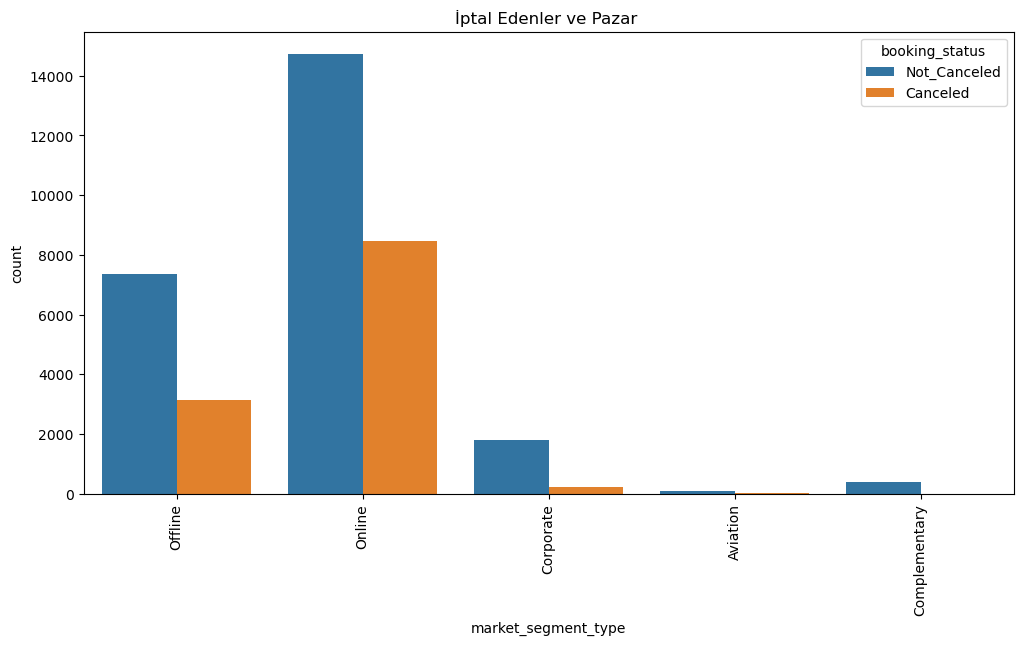

In [19]:
plt.figure(figsize=(12,6))
plt.title("İptal Edenler ve Pazar ")
sns.countplot(x=df['market_segment_type'], hue=df.booking_status);
plt.xticks(rotation=90);

In [18]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [20]:
df.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820


In [21]:
df.drop("Booking_ID",axis=1,inplace=True)

In [22]:
data=pd.get_dummies(df,drop_first=True)

In [24]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,1,0,1
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,1,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,1,0
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,1,0
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,0,1,0,0,0,0,0,0,1,1
36271,2,0,1,3,0,228,2018,10,17,0,...,0,0,0,0,0,0,0,0,1,0
36272,2,0,2,6,0,148,2018,7,1,0,...,0,0,0,0,0,0,0,0,1,1
36273,2,0,0,3,0,63,2018,4,21,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
y=data["booking_status_Not_Canceled"]
x=data.drop("booking_status_Not_Canceled",axis=1)

In [29]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    from sklearn.model_selection import train_test_split
       
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [30]:
classification_funct(x,y)

C:\Users\BA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,accuracy_score
RandomForestClassifier,0.905996
XGBClassifier,0.890972
DecisionTreeClassifier,0.870572
KNeighborsClassifier,0.809511
LogisticRegression,0.800138
SVC,0.764990
BernoulliNB,0.733563
GaussianNB,0.413646
